In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

Load data

In [304]:
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Exploratory Data Analysis(EDA)

In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [306]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [307]:
data.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [308]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Drop Unnecessary column

In [309]:
iris_data=data.drop(['Id'], axis=1)
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [310]:
iris_data['Species'].value_counts()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

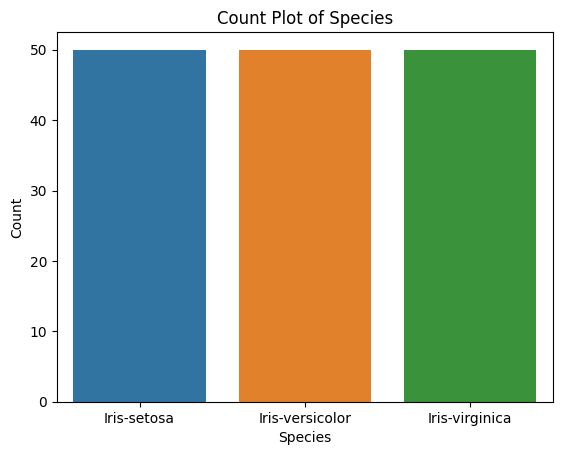

In [311]:
sns.countplot(x='Species', data=iris_data)
plt.title('Count Plot of Species')
plt.xlabel('Species')
plt.ylabel('Count')

plt.show()

In [312]:
x=iris_data.iloc[:,:4]
y=iris_data.iloc[:,4]

Split data in train 80% and test 20%

In [313]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2)

In [314]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


Logistic Regression

In [315]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression(max_iter=200)
model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [316]:
y_pred=model.predict(x_test)

In [317]:
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
print(df_comparison)

              Actual        Predicted
70   Iris-versicolor   Iris-virginica
88   Iris-versicolor  Iris-versicolor
61   Iris-versicolor  Iris-versicolor
20       Iris-setosa      Iris-setosa
12       Iris-setosa      Iris-setosa
91   Iris-versicolor  Iris-versicolor
128   Iris-virginica   Iris-virginica
140   Iris-virginica   Iris-virginica
133   Iris-virginica  Iris-versicolor
132   Iris-virginica   Iris-virginica
76   Iris-versicolor  Iris-versicolor
37       Iris-setosa      Iris-setosa
16       Iris-setosa      Iris-setosa
66   Iris-versicolor  Iris-versicolor
29       Iris-setosa      Iris-setosa
78   Iris-versicolor  Iris-versicolor
87   Iris-versicolor  Iris-versicolor
0        Iris-setosa      Iris-setosa
136   Iris-virginica   Iris-virginica
25       Iris-setosa      Iris-setosa
119   Iris-virginica  Iris-versicolor
135   Iris-virginica   Iris-virginica
64   Iris-versicolor  Iris-versicolor
8        Iris-setosa      Iris-setosa
27       Iris-setosa      Iris-setosa
48       Iri

In [318]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.88      0.78      0.82         9

       accuracy                           0.90        30
      macro avg       0.89      0.89      0.89        30
   weighted avg       0.90      0.90      0.90        30



 DecisionTree Classifier

In [319]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [320]:
y_pred1=model.predict(x_test)

In [321]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.88      0.78      0.82         9

       accuracy                           0.90        30
      macro avg       0.89      0.89      0.89        30
   weighted avg       0.90      0.90      0.90        30



Support Vector Classification(SVC)

In [322]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(x_train,y_train)

SVC()

In [323]:
pred2 = model_svc.predict(x_test)

In [324]:
print(classification_report(y_test,pred2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [332]:
from sklearn.metrics import accuracy_score
print("Accuracy Score")
print("Linear Regression:",accuracy_score(y_test, y_pred)*100)
print("Decision Tree",accuracy_score(y_test, y_pred1)*100)
print("SVC",accuracy_score(y_test, pred2)*100)

Accuracy Score
Linear Regression: 90.0
Decision Tree 90.0
SVC 96.66666666666667


Mannual Prediction

In [325]:
X_new = np.array([[5.4,3.7,1.5,0.2],[6,2.2,4,1],[7.7,3.8,6.7,2.2]])
pred = model.predict(X_new)
print("Prediction of Species: {}".format(pred))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [326]:
X_new = np.array([[5.4,3.7,1.5,0.2],[6,2.2,4,1],[7.7,3.8,6.7,2.2]])
pred = model_DT.predict(X_new)
print("Prediction of Species: {}".format(pred))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [327]:
X_new = np.array([[5.4,3.7,1.5,0.2],[6,2.2,4,1],[7.7,3.8,6.7,2.2]])
pred = model_svc.predict(X_new)
print("Prediction of Species: {}".format(pred))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Data is already pre-processed and clean. According to that all model performance is good.We can use any model for classification but In this case,
SVC has the highest overall accuracy (0.97) among the three models, indicating that it correctly predicts 97% of the instances in the test set. It also has perfect precision, recall, and F1-score for Iris-setosa, indicating that it accurately predicts all instances of this class. For Iris-versicolor and Iris-virginica, it has high precision, recall, and F1-score as well, indicating good performance on these classes.